# Collect Tweets into MongoDB

## Install Python libraries

You may need to restart your Jupyter Notebook instance after installed those libraries.

In [ ]:
!pip install pymongo

In [ ]:
!pip install pymongo[srv]

In [ ]:
!pip install dnspython

In [ ]:
!pip install tweepy

In [ ]:
!pip install twitter

## Import Python libraries

In [1]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

##  Load the Authorization Info

Save database connection info and API Keys in a config.ini file and use the configparse to load the authorization info. 

In [2]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secrete']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secrete']

mongod_connect = config['mymongo']['connection']

## Connect to the MongoDB Cluster

In [3]:
client = MongoClient(mongod_connect)
db = client.gp5 # use or create a database named demo
tweet_collection = db.lab10 #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

## Use the Streaming API to Collect Tweets

Authorize the Stream API 

In [4]:
stream_auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
stream_auth.set_access_token(OAUTH_TOKEN, OATH_TOKEN_SECRET)

strem_api = tweepy.API(stream_auth)

Define the query for the Stream API

In [5]:
track = ['covid19'] # define the keywords, tweets contain election

#locations = [-78.9326449,38.4150904,-78.8816972,38.4450731] #defin the location, in Harrisonburg, VA

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> OR </span> are located in Harrisonburg, VA

In [6]:
class MyStreamListener(tweepy.StreamListener):
    def on_status(self, status):
        print (status.id_str)
        try:
            tweet_collection.insert_one(status._json)
        except:
            pass
  
    def on_error(self, status_code):
        if status_code == 420:
            #returning False in on_data disconnects the stream
            return False
myStreamListener = MyStreamListener()
myStream = tweepy.Stream(auth = strem_api.auth, listener=myStreamListener)
myStream.filter(track=track)#  (locations = locations)   #Use either track or locations

1323310894630273027
1323310894785417218
1323310894886117376
1323310895167115265
1323310895125172225
1323310895540379648
1323310897054580737
1323310897146830855
1323310897272659974
1323310897327198208
1323310897809494016
1323310898128261122
1323310899151720450
1323310899701174272
1323310900007325697
1323310900489687042
1323310900724473856
1323310901114621954
1323310901097910272
1323310901005586434
1323310901466836994
1323310902171570178
1323310902557478914
1323310902939144195
1323310902645530626
1323310903031463937
1323310903274672129
1323310903425699840
1323310903870279681
1323310904583188480
1323310904881123328
1323310904667234312
1323310904637714432
1323310905208307712
1323310905875066880
1323310906017828865
1323310906504339458
1323310906944720897
1323310907158491136
1323310907460624389
1323310907905220610
1323310908148502530
1323310908479840256
1323310909079670785
1323310909574516737
1323310909373272064
1323310912267341824
1323310912627986440
1323310912674189318
1323310913324306439


KeyboardInterrupt: 

## Use the REST API to Collect Tweets

Authorize the REST API 

In [7]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

Define the query for the REST API

In [9]:
count = 100 #number of returned tweets, default and max is 100
#geocode = "38.4392897,-78.9412224,50mi"  # defin the location, in Harrisonburg, VA
q = "covid19"                               #define the keywords, tweets contain election

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> AND </span> are located in Harrisonburg, VA

In [11]:
search_results = rest_api.search.tweets( count=count,q=q) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

'Mon Nov 02 17:13:12 +0000 2020'
'Mon Nov 02 17:13:11 +0000 2020'
'Mon Nov 02 17:13:11 +0000 2020'
'Mon Nov 02 17:13:11 +0000 2020'
'Mon Nov 02 17:13:11 +0000 2020'
'Mon Nov 02 17:13:11 +0000 2020'
'Mon Nov 02 17:13:11 +0000 2020'
'Mon Nov 02 17:13:11 +0000 2020'
'Mon Nov 02 17:13:11 +0000 2020'
'Mon Nov 02 17:13:11 +0000 2020'
'Mon Nov 02 17:13:11 +0000 2020'
'Mon Nov 02 17:13:11 +0000 2020'
'Mon Nov 02 17:13:10 +0000 2020'
'Mon Nov 02 17:13:10 +0000 2020'
'Mon Nov 02 17:13:10 +0000 2020'
'Mon Nov 02 17:13:10 +0000 2020'
'Mon Nov 02 17:13:09 +0000 2020'
'Mon Nov 02 17:13:09 +0000 2020'
'Mon Nov 02 17:13:09 +0000 2020'
'Mon Nov 02 17:13:08 +0000 2020'
'Mon Nov 02 17:13:08 +0000 2020'
'Mon Nov 02 17:13:08 +0000 2020'
'Mon Nov 02 17:13:08 +0000 2020'
'Mon Nov 02 17:13:08 +0000 2020'
'Mon Nov 02 17:13:08 +0000 2020'
'Mon Nov 02 17:13:08 +0000 2020'
'Mon Nov 02 17:13:07 +0000 2020'
'Mon Nov 02 17:13:07 +0000 2020'
'Mon Nov 02 17:13:07 +0000 2020'
'Mon Nov 02 17:13:07 +0000 2020'
'Mon Nov 0

Continue fetching early tweets with the same query. 
<p><span style="color:red;font-weight:bold">YOU WILL REACH YOUR RATE LIMIT VERY FAST</span></p>

In [12]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                        max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

'Mon Nov 02 17:12:56 +0000 2020'
'Mon Nov 02 17:12:56 +0000 2020'
'Mon Nov 02 17:12:56 +0000 2020'
'Mon Nov 02 17:12:56 +0000 2020'
'Mon Nov 02 17:12:56 +0000 2020'
'Mon Nov 02 17:12:55 +0000 2020'
'Mon Nov 02 17:12:55 +0000 2020'
'Mon Nov 02 17:12:55 +0000 2020'
'Mon Nov 02 17:12:55 +0000 2020'
'Mon Nov 02 17:12:55 +0000 2020'
'Mon Nov 02 17:12:55 +0000 2020'
'Mon Nov 02 17:12:55 +0000 2020'
'Mon Nov 02 17:12:55 +0000 2020'
'Mon Nov 02 17:12:55 +0000 2020'
'Mon Nov 02 17:12:55 +0000 2020'
'Mon Nov 02 17:12:54 +0000 2020'
'Mon Nov 02 17:12:54 +0000 2020'
'Mon Nov 02 17:12:54 +0000 2020'
'Mon Nov 02 17:12:54 +0000 2020'
'Mon Nov 02 17:12:54 +0000 2020'
'Mon Nov 02 17:12:54 +0000 2020'
'Mon Nov 02 17:12:53 +0000 2020'
'Mon Nov 02 17:12:53 +0000 2020'
'Mon Nov 02 17:12:53 +0000 2020'
'Mon Nov 02 17:12:53 +0000 2020'
'Mon Nov 02 17:12:53 +0000 2020'
'Mon Nov 02 17:12:53 +0000 2020'
'Mon Nov 02 17:12:53 +0000 2020'
'Mon Nov 02 17:12:52 +0000 2020'
'Mon Nov 02 17:12:52 +0000 2020'
'Mon Nov 0

'Mon Nov 02 17:12:13 +0000 2020'
'Mon Nov 02 17:12:13 +0000 2020'
'Mon Nov 02 17:12:13 +0000 2020'
'Mon Nov 02 17:12:13 +0000 2020'
'Mon Nov 02 17:12:13 +0000 2020'
'Mon Nov 02 17:12:13 +0000 2020'
'Mon Nov 02 17:12:13 +0000 2020'
'Mon Nov 02 17:12:13 +0000 2020'
'Mon Nov 02 17:12:12 +0000 2020'
'Mon Nov 02 17:12:12 +0000 2020'
'Mon Nov 02 17:12:12 +0000 2020'
'Mon Nov 02 17:12:12 +0000 2020'
'Mon Nov 02 17:12:12 +0000 2020'
'Mon Nov 02 17:12:12 +0000 2020'
'Mon Nov 02 17:12:12 +0000 2020'
'Mon Nov 02 17:12:11 +0000 2020'
'Mon Nov 02 17:12:11 +0000 2020'
'Mon Nov 02 17:12:10 +0000 2020'
'Mon Nov 02 17:12:10 +0000 2020'
'Mon Nov 02 17:12:10 +0000 2020'
'Mon Nov 02 17:12:10 +0000 2020'
'Mon Nov 02 17:12:10 +0000 2020'
'Mon Nov 02 17:12:10 +0000 2020'
'Mon Nov 02 17:12:10 +0000 2020'
'Mon Nov 02 17:12:10 +0000 2020'
'Mon Nov 02 17:12:10 +0000 2020'
'Mon Nov 02 17:12:10 +0000 2020'
'Mon Nov 02 17:12:10 +0000 2020'
'Mon Nov 02 17:12:10 +0000 2020'
'Mon Nov 02 17:12:10 +0000 2020'
'Mon Nov 0

'Mon Nov 02 17:11:31 +0000 2020'
'Mon Nov 02 17:11:31 +0000 2020'
'Mon Nov 02 17:11:31 +0000 2020'
'Mon Nov 02 17:11:31 +0000 2020'
'Mon Nov 02 17:11:31 +0000 2020'
'Mon Nov 02 17:11:30 +0000 2020'
'Mon Nov 02 17:11:29 +0000 2020'
'Mon Nov 02 17:11:29 +0000 2020'
'Mon Nov 02 17:11:29 +0000 2020'
'Mon Nov 02 17:11:29 +0000 2020'
'Mon Nov 02 17:11:29 +0000 2020'
'Mon Nov 02 17:11:28 +0000 2020'
'Mon Nov 02 17:11:28 +0000 2020'
'Mon Nov 02 17:11:28 +0000 2020'
'Mon Nov 02 17:11:28 +0000 2020'
'Mon Nov 02 17:11:28 +0000 2020'
'Mon Nov 02 17:11:28 +0000 2020'
'Mon Nov 02 17:11:28 +0000 2020'
'Mon Nov 02 17:11:28 +0000 2020'
'Mon Nov 02 17:11:27 +0000 2020'
'Mon Nov 02 17:11:27 +0000 2020'
'Mon Nov 02 17:11:27 +0000 2020'
'Mon Nov 02 17:11:27 +0000 2020'
'Mon Nov 02 17:11:27 +0000 2020'
'Mon Nov 02 17:11:27 +0000 2020'
'Mon Nov 02 17:11:27 +0000 2020'
'Mon Nov 02 17:11:27 +0000 2020'
'Mon Nov 02 17:11:27 +0000 2020'
'Mon Nov 02 17:11:26 +0000 2020'
'Mon Nov 02 17:11:26 +0000 2020'
'Mon Nov 0

'Mon Nov 02 17:10:33 +0000 2020'
'Mon Nov 02 17:10:33 +0000 2020'
'Mon Nov 02 17:10:32 +0000 2020'
'Mon Nov 02 17:10:32 +0000 2020'
'Mon Nov 02 17:10:32 +0000 2020'
'Mon Nov 02 17:10:32 +0000 2020'
'Mon Nov 02 17:10:32 +0000 2020'
'Mon Nov 02 17:10:32 +0000 2020'
'Mon Nov 02 17:10:32 +0000 2020'
'Mon Nov 02 17:10:32 +0000 2020'
'Mon Nov 02 17:10:32 +0000 2020'
'Mon Nov 02 17:10:31 +0000 2020'
'Mon Nov 02 17:10:31 +0000 2020'
'Mon Nov 02 17:10:31 +0000 2020'
'Mon Nov 02 17:10:31 +0000 2020'
'Mon Nov 02 17:10:31 +0000 2020'
'Mon Nov 02 17:10:30 +0000 2020'
'Mon Nov 02 17:10:30 +0000 2020'
'Mon Nov 02 17:10:30 +0000 2020'
'Mon Nov 02 17:10:30 +0000 2020'
'Mon Nov 02 17:10:30 +0000 2020'
'Mon Nov 02 17:10:30 +0000 2020'
'Mon Nov 02 17:10:30 +0000 2020'
'Mon Nov 02 17:10:30 +0000 2020'
'Mon Nov 02 17:10:30 +0000 2020'
'Mon Nov 02 17:10:30 +0000 2020'
'Mon Nov 02 17:10:30 +0000 2020'
'Mon Nov 02 17:10:29 +0000 2020'
'Mon Nov 02 17:10:29 +0000 2020'
'Mon Nov 02 17:10:29 +0000 2020'
'Mon Nov 0

'Mon Nov 02 17:09:49 +0000 2020'
'Mon Nov 02 17:09:48 +0000 2020'
'Mon Nov 02 17:09:48 +0000 2020'
'Mon Nov 02 17:09:48 +0000 2020'
'Mon Nov 02 17:09:48 +0000 2020'
'Mon Nov 02 17:09:48 +0000 2020'
'Mon Nov 02 17:09:47 +0000 2020'
'Mon Nov 02 17:09:47 +0000 2020'
'Mon Nov 02 17:09:47 +0000 2020'
'Mon Nov 02 17:09:47 +0000 2020'
'Mon Nov 02 17:09:47 +0000 2020'
'Mon Nov 02 17:09:47 +0000 2020'
'Mon Nov 02 17:09:47 +0000 2020'
'Mon Nov 02 17:09:47 +0000 2020'
'Mon Nov 02 17:09:47 +0000 2020'
'Mon Nov 02 17:09:46 +0000 2020'
'Mon Nov 02 17:09:46 +0000 2020'
'Mon Nov 02 17:09:46 +0000 2020'
'Mon Nov 02 17:09:45 +0000 2020'
'Mon Nov 02 17:09:45 +0000 2020'
'Mon Nov 02 17:09:45 +0000 2020'
'Mon Nov 02 17:09:45 +0000 2020'
'Mon Nov 02 17:09:45 +0000 2020'
'Mon Nov 02 17:09:44 +0000 2020'
'Mon Nov 02 17:09:44 +0000 2020'
'Mon Nov 02 17:09:44 +0000 2020'
'Mon Nov 02 17:09:44 +0000 2020'
'Mon Nov 02 17:09:43 +0000 2020'
'Mon Nov 02 17:09:43 +0000 2020'
'Mon Nov 02 17:09:43 +0000 2020'
'Mon Nov 0

KeyboardInterrupt: 

## View the Collected Tweets

Print the number of tweets and unique twitter users

In [13]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users 

1762
1629


Create a text index and print the Tweets containing specific keywords. 

In [14]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index


'text_index'

Create a cursor to query tweets with the created index

In [15]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "election"}}) # return tweets contain vote

Use pprint to display tweets

In [16]:

for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#         pprint (document) # use pprint to print the entire tweet document
   
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: Info Devbhumidwarka GOG
text: RT @InfoGujarat: COVID SAFE election!

Are you ready to #GoVote?

#ByeElectionGujarat2020
#NoVoterToBeLeftBehind
#EveryVoteCounts 
#COVID19…
----
name: Mike Goldstein
text: @realDonaldTrump and the @GOP are promoting violence on and before election day. We must #FireTRUMP #FireGOP… https://t.co/yGfhk53vfB
----
name: Ursi
text: RT @Msdesignerlady: There is 1 day left until Election Day!

What was the October surprise promised by Trump?
- healthcare? NO
- stimulus?…
----
name: Ben White
text: RT @CommonTalkPod: Dr. Michael Hirsh joined us this morning to talk about #COVID19, Trump, the election, and where we are locally with #Cor…
----
name: LLS
text: RT @AndyOstroy: Dear Pennsylvania Dems, independents &amp; moderate Repubs: this election is about ending #Covid19, saving healthcare &amp; the eco…
----
name: Stephanie M Lewis
text: RT @AndyOstroy: Dear Pennsylvania Dems, independents &amp; moderate Repubs: this election is about ending #Covid19, s

In [17]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "election"}}) # return tweets contain vote

Use pandas to display tweets

In [18]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,...,retweeted_status,is_quote_status,quoted_status_id,quoted_status_id_str,retweet_count,favorite_count,favorited,retweeted,lang,possibly_sensitive
0,5fa03e678c97c7e5b091dc07,Mon Nov 02 17:12:16 +0000 2020,1323311979038040064,1323311979038040064,RT @InfoGujarat: COVID SAFE election!\n\nAre y...,False,"{'hashtags': [{'text': 'GoVote', 'indices': [5...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",None,...,{'created_at': 'Mon Nov 02 13:09:52 +0000 2020...,True,1.323243e+18,1323242937916874754,6,0,False,False,en,NaN
1,5fa03e738c97c7e5b091e02f,Mon Nov 02 17:09:26 +0000 2020,1323311265398296577,1323311265398296577,@realDonaldTrump and the @GOP are promoting vi...,True,"{'hashtags': [{'text': 'FireTRUMP', 'indices':...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",None,...,NaN,False,NaN,NaN,0,0,False,False,en,NaN
2,5fa03e718c97c7e5b091dfa4,Mon Nov 02 17:09:48 +0000 2020,1323311356699910147,1323311356699910147,RT @Msdesignerlady: There is 1 day left until ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",None,...,{'created_at': 'Mon Nov 02 16:48:38 +0000 2020...,False,NaN,NaN,8,0,False,False,en,NaN
3,5fa03e738c97c7e5b091e05c,Mon Nov 02 17:09:19 +0000 2020,1323311236038217729,1323311236038217729,RT @CommonTalkPod: Dr. Michael Hirsh joined us...,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",None,...,{'created_at': 'Mon Nov 02 16:54:33 +0000 2020...,False,NaN,NaN,1,0,False,False,en,False
4,5fa03e728c97c7e5b091dfd8,Mon Nov 02 17:09:39 +0000 2020,1323311321752965127,1323311321752965127,"RT @AndyOstroy: Dear Pennsylvania Dems, indepe...",False,"{'hashtags': [{'text': 'Covid19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",None,...,{'created_at': 'Mon Nov 02 16:15:06 +0000 2020...,False,NaN,NaN,62,0,False,False,en,NaN
5,5fa03e718c97c7e5b091dfaa,Mon Nov 02 17:09:47 +0000 2020,1323311355139629056,1323311355139629056,"RT @AndyOstroy: Dear Pennsylvania Dems, indepe...",False,"{'hashtags': [{'text': 'Covid19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",None,...,{'created_at': 'Mon Nov 02 16:15:06 +0000 2020...,False,NaN,NaN,62,0,False,False,en,NaN
6,5fa03e6b8c97c7e5b091dd6f,Mon Nov 02 17:11:20 +0000 2020,1323311742735339521,1323311742735339521,"RT @AndyOstroy: Dear Pennsylvania Dems, indepe...",False,"{'hashtags': [{'text': 'Covid19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",None,...,{'created_at': 'Mon Nov 02 16:15:06 +0000 2020...,False,NaN,NaN,62,0,False,False,en,NaN


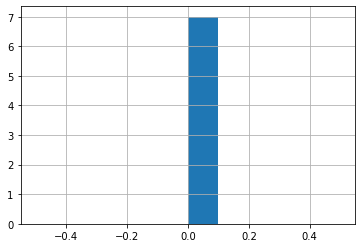

In [20]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count